In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting different graph
#from google.colab import drive # For drive access from Coolab
import seaborn as sns # for violin graph

import xgboost as xgb #for xgboost classifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
import matplotlib.pylab as pl
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.preprocessing import LabelBinarizer

import pandas as pd
import pickle
from tqdm import tqdm


import statistics 
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# print the JS visualization code to the notebook
#shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [7]:
ND_PaTaKa_data = 'features_for_ND_T5_Pataka.csv'
Conc_PaTaKa_data = 'features_for_Concussion_T5_Pataka.csv'
HC_PaTaKa_data = 'features_for_TWC_Healthy_T5_Pataka.csv'
df_ND_PaTaKa = pd.read_csv(ND_PaTaKa_data)
df_Conc_PaTaKa = pd.read_csv(Conc_PaTaKa_data)
df_HC_PaTaKa = pd.read_csv(HC_PaTaKa_data)

column_to_drop = 'apq11Shimmer'
df_ND_PaTaKa = df_ND_PaTaKa.drop(column_to_drop, axis=1)
df_Conc_PaTaKa = df_Conc_PaTaKa.drop(column_to_drop, axis=1)
df_HC_PaTaKa = df_HC_PaTaKa.drop(column_to_drop, axis=1)

#choosen_feature_list = ['ID_audio','spectral_bandwidth', 'mfcc', 'duration', 'ppq5Jitter', 'ddaShimmer']
p_val_satisfied_list = ['ID_audio','spectral_bandwidth','mfcc','zero_crossing_rate','spectral_flatness','duration','AvgPower','spectral_centroid','melspectrogram','spectral_rolloff','poly_features','f2_median','f2_mean','chroma_cens','stdevF0Hz','spectral_contrast','ppq5Jitter','chroma_stft','chroma_cqt','ddaShimmer','apq3Shimmer','meanF0Hz','localdbShimmer','HNR','ddpJitter','rapJitter','apq5Shimmer','f3_median']

choosen_feature_list = ['ID_audio','spectral_bandwidth', 'mfcc', 'duration', 'zero_crossing_rate', 'spectral_flatness']

df_ND_PaTaKa = df_ND_PaTaKa[p_val_satisfied_list]
df_Conc_PaTaKa = df_Conc_PaTaKa[p_val_satisfied_list]
df_HC_PaTaKa = df_HC_PaTaKa[p_val_satisfied_list]


df_ND_PaTaKa = df_ND_PaTaKa.dropna()
df_Conc_PaTaKa = df_Conc_PaTaKa.dropna()
df_HC_PaTaKa = df_HC_PaTaKa.dropna()


####################### Datashape description Pataka
#print(df_ND_PaTaKa.shape) #(34, 38)
#print(df_ND_PaTaKa.dropna().shape) #(34, 38)

#print(df_Conc_PaTaKa.shape) #(95, 38)
#print(df_Conc_PaTaKa.dropna().shape) #(93, 38)

#print(df_HC_PaTaKa.shape) #(94, 38)
#print(df_HC_PaTaKa.dropna().shape) #(93, 38)

IndentationError: unexpected indent (3911284809.py, line 17)

In [1]:
####################### Datashape description SV
print(df_ND_PaTaKa.shape) #(36, 39)
print(df_ND_PaTaKa.dropna().shape) #(36, 39)

print(df_Conc_PaTaKa.shape) #(91, 39)
print(df_Conc_PaTaKa.dropna().shape) #(91, 39)

print(df_HC_PaTaKa.shape) #(104, 39)
print(df_HC_PaTaKa.dropna().shape) #(104, 39)

In [33]:
#### CC - 0, HC - 1, ND - 2
df_ND_PaTaKa['label'] = 2
df_Conc_PaTaKa['label'] = 0
df_HC_PaTaKa['label'] = 1
df_marge_HC_ND_CC = pd.concat([df_ND_PaTaKa,df_Conc_PaTaKa,df_HC_PaTaKa],ignore_index=True)
print(df_marge_HC_ND_CC.shape)
df_marge_HC_ND_CC = df_marge_HC_ND_CC.dropna()
print(df_marge_HC_ND_CC.shape)
X = df_marge_HC_ND_CC.iloc[:,1:-1]  # all rows, all the features and no labels
y = df_marge_HC_ND_CC.iloc[:, -1]

(220, 29)
(220, 29)


In [34]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Normalize the DataFrame using Min-Max scaling
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42,stratify=y)
print(y_test.shape)


(44,)


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[23:42:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

Accuracy of Model:: 0.9545454545454546
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.90      1.00      0.95        18
           2       1.00      1.00      1.00         7

    accuracy                           0.95        44
   macro avg       0.97      0.96      0.96        44
weighted avg       0.96      0.95      0.95        44



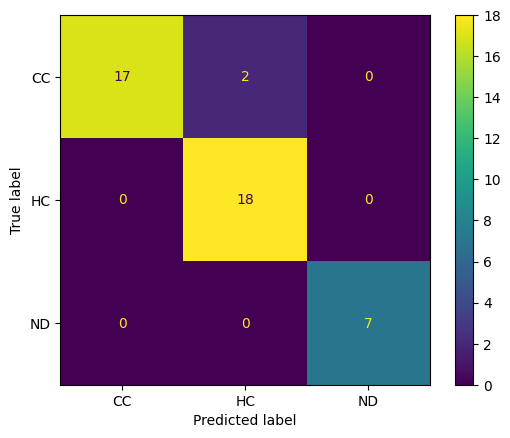

In [35]:
# xgboost definition
xgbc = xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=150,
                    max_depth=6,
                    min_child_weight=0,
                    gamma=0,
                    reg_lambda=1,
                    subsample=1,
                    colsample_bytree=0.75,
                    scale_pos_weight=1,
                    objective='multi:softprob',
                    num_class=3,
                    random_state=10)
#fitting model
mcl = xgbc.fit(X_train, y_train, eval_metric='mlogloss')
# prediction output
y_pred = mcl.predict(X_test)
# probability of predicted output
proba = mcl.predict_proba(X_test)

from sklearn.metrics import auc, accuracy_score
print("Accuracy of Model::",accuracy_score(y_test,y_pred))

from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['CC','HC','ND'])
disp.plot()

Best Kernel:  linear
Best Hyperparameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best Score:  0.8919047619047618
Accuracy on Test Set:  0.9318181818181818
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.94      0.89      0.91        18
           2       1.00      1.00      1.00         7

    accuracy                           0.93        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.93      0.93      0.93        44



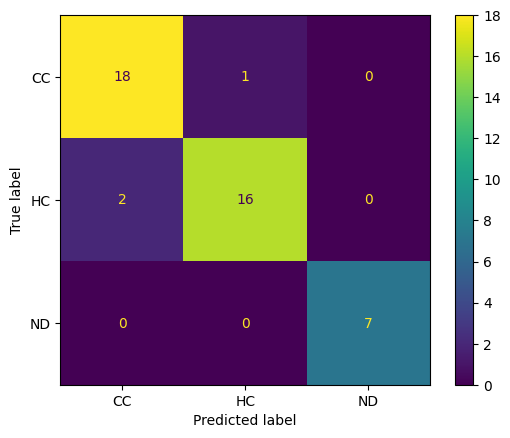

In [36]:
Info_list = []
######################################################
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Support Vector Machine

from sklearn import svm
# Define the hyperparameters to tune and their possible values
parameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Create an SVM classifier
svm_classifier = svm.SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best kernel and hyperparameters
print("Best Kernel: ", grid_search.best_params_['kernel'])
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Info_list.append(["Support Vector Machine",grid_search.best_params_,grid_search.best_score_])

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set: ", accuracy)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['CC','HC','ND'])
disp.plot()

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.9657142857142856
Accuracy on Test Set:  0.9318181818181818
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.89      0.94      0.92        18
           2       1.00      1.00      1.00         7

    accuracy                           0.93        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.93      0.93      0.93        44



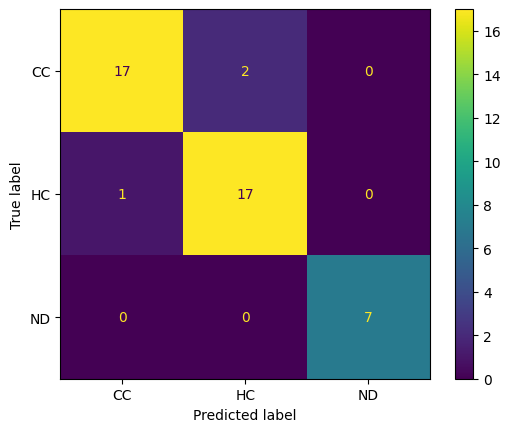

In [37]:


# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameters to tune and their possible values
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt_classifier, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Info_list.append(["DecisionTree",grid_search.best_params_,grid_search.best_score_])

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set: ", accuracy)
print(classification_report(y_test,y_pred))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['CC','HC','ND'])
disp.plot()

Best Hyperparameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.9771428571428572
Accuracy on Test Set:  0.9090909090909091
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.89      0.89      0.89        18
           2       1.00      1.00      1.00         7

    accuracy                           0.91        44
   macro avg       0.93      0.93      0.93        44
weighted avg       0.91      0.91      0.91        44



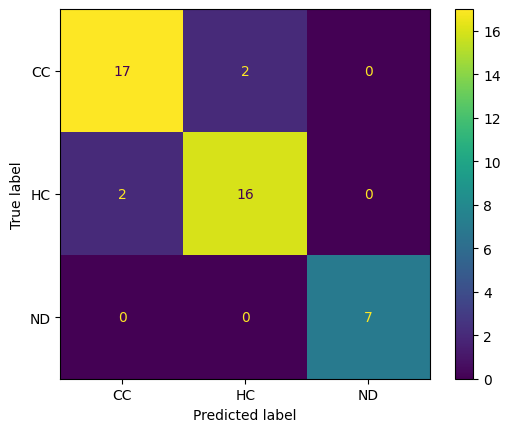

In [38]:
########################################
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters to tune and their possible values
parameters = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set: ", accuracy)

Info_list.append(["RandomForest",grid_search.best_params_,grid_search.best_score_])

from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['CC','HC','ND'])
disp.plot()